In [413]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [416]:
# Open an image file
image = Image.open("White_Picture(1920x1080).jpg")

# Create an ImageDraw object
draw = ImageDraw.Draw(image)

# Define circle parameters
x, y, r = 500, 500, 50  # Example coordinates for the center and radius of the circle

# Define the bounding box for the circle
leftUpPoint = (x - r, y - r)
rightDownPoint = (x + r, y + r)
twoPointList = [leftUpPoint, rightDownPoint]

# Draw a filled red circle on the image
draw.ellipse(twoPointList, fill=(255, 0, 0, 255))

# Save the edited image
image.save("Edited_Image.jpg")

# Display the edited image
image.show()

In [427]:
# im = Image.open(‘myfile.png’, ‘ r’), creating an image object to open image
im_w = Image.open('White_Picture(1920x1080).jpg','r')

# pix_val = list(im.getdata()), used to get pixel values
pix_val_w = list(im_w.getdata())

# Flattening array
pix_val_w_flat = [x for sets in pix_val_w for x in sets]

# The way it is reshaped:
# number of rows = 1080
# number of columns = 1920 
# each entry gives the three pixel values R,G,B
pix_val_w = np.array(pix_val_w).reshape(1080,1920,3) 

# Given a picture of any dimensions Produce evenly scattered points throughout
HeightPic= 1080;           # Height of the picture in pixels
WidthPic = 1920;           # Width of the picture in pixels
PixL= 1;                   # Pixel Physical Length 
NumPts= 10;                # Number of points that should be scattered througout image
BlotchEveryPxlH = np.linspace(0,HeightPic,NumPts) - 1; # This gives every pixel that needs to be changed in to give you correct num of pts 
BlotchEveryPxlH[0] = 0
BlotchEveryPxlW = np.linspace(0,WidthPic,NumPts) - 1;  # This gives every pixel that needs to be changed to give you correct num of pts 
BlotchEveryPxlW[0] = 0

Remade_Pxls = pix_val_w;
# Create an ImageDraw object
draw = ImageDraw.Draw(im_w)

# i.e. NumPts = 5 then points will be a 5 x 5 square space evenly througout
for i in range(np.size(BlotchEveryPxlH)):
    for j in range (np.size(BlotchEveryPxlW)):       
        # Define circle parameters
        y = BlotchEveryPxlH[i].astype(int)    # Y position of pixel we want to change
        x = BlotchEveryPxlW[j].astype(int)    # X position of pixel we want to change
        r = 10  # Example coordinates for the center and radius of the circle

        # Define the bounding box for the circle
        leftUpPoint = (x - r, y - r)
        rightDownPoint = (x + r, y + r)
        twoPointList = [leftUpPoint, rightDownPoint]

        # Draw a filled red circle on the image
        draw.ellipse(twoPointList, fill=(255, 215, 0, 255))

# Save the edited image
im_w.save("Edited_Image.jpg")
        
# Display the edited image
im_w.show()




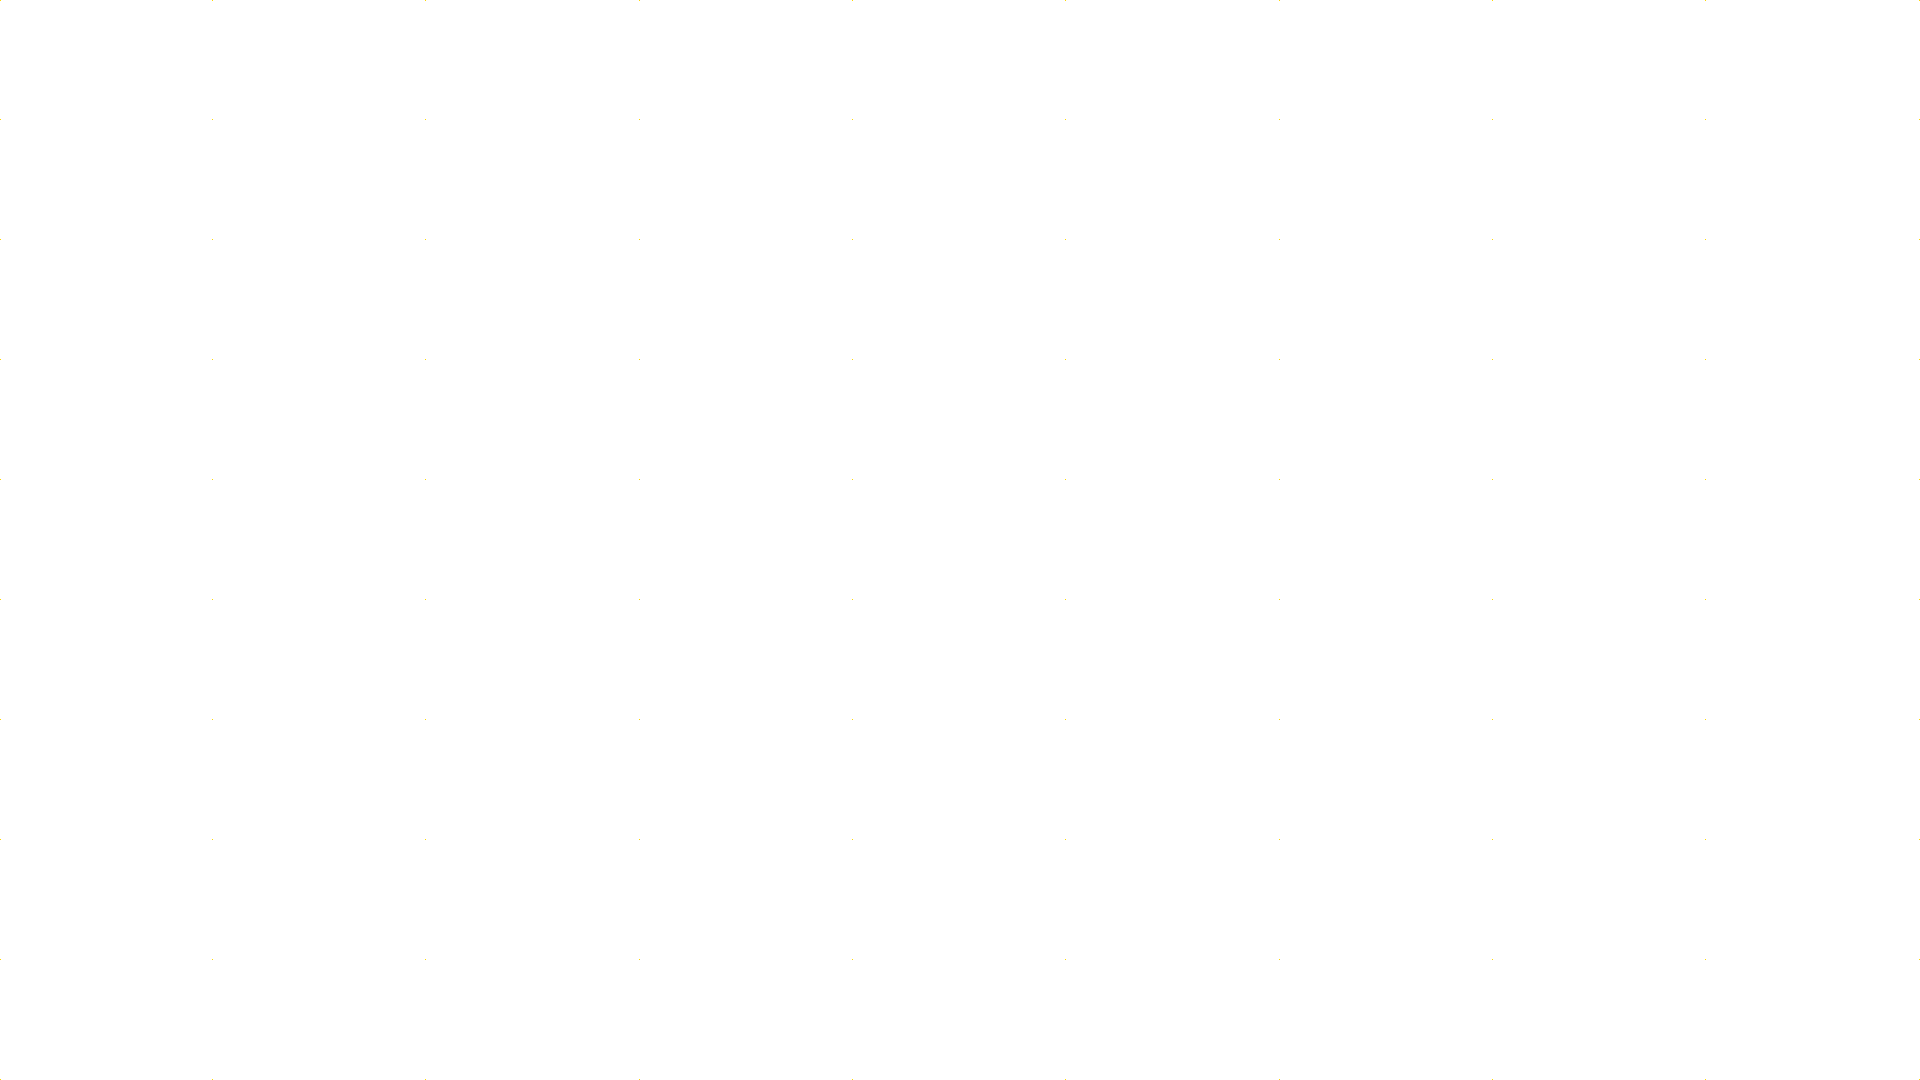

In [425]:
# im = Image.open(‘myfile.png’, ‘ r’), creating an image object to open image
im_w = Image.open('White_Picture(1920x1080).jpg','r')

# pix_val = list(im.getdata()), used to get pixel values
pix_val_w = list(im_w.getdata())

# Flattening array
pix_val_w_flat = [x for sets in pix_val_w for x in sets]

# The way it is reshaped:
# number of rows = 1080
# number of columns = 1920 
# each entry gives the three pixel values R,G,B
pix_val_w = np.array(pix_val_w).reshape(1080,1920,3) 

# Given a picture of any dimensions Produce evenly scattered points throughout
HeightPic= 1080;           # Height of the picture in pixels
WidthPic = 1920;           # Width of the picture in pixels
PixL= 1;                   # Pixel Physical Length 
NumPts= 10;                # Number of points that should be scattered througout image
BlotchEveryPxlH = np.linspace(0,HeightPic,NumPts) - 1; # This gives every pixel that needs to be changed in to give you correct num of pts 
BlotchEveryPxlH[0] = 0
BlotchEveryPxlW = np.linspace(0,WidthPic,NumPts) - 1;  # This gives every pixel that needs to be changed to give you correct num of pts 
BlotchEveryPxlW[0] = 0

Remade_Pxls = pix_val_w;
# i.e. NumPts = 5 then points will be a 5 x 5 square space evenly througout
for i in range(np.size(BlotchEveryPxlH)):
    for j in range (np.size(BlotchEveryPxlW)):
        Row_Index = BlotchEveryPxlH[i].astype(int)    # Y position of pixel we want to change
        Column_Index = BlotchEveryPxlW[j].astype(int) # X position of pixel we want to change
        Remade_Pxls[Row_Index,Column_Index,0] = 255;
        Remade_Pxls[Row_Index,Column_Index,1] = 215;
        Remade_Pxls[Row_Index,Column_Index,2] = 0;
            
# Convert the pixels into an array using numpy
picArray = np.array(Remade_Pxls, dtype=np.uint8)
# Use PIL to create an image from the new array of pixels
pts_image = Image.fromarray(picArray)

pts_image



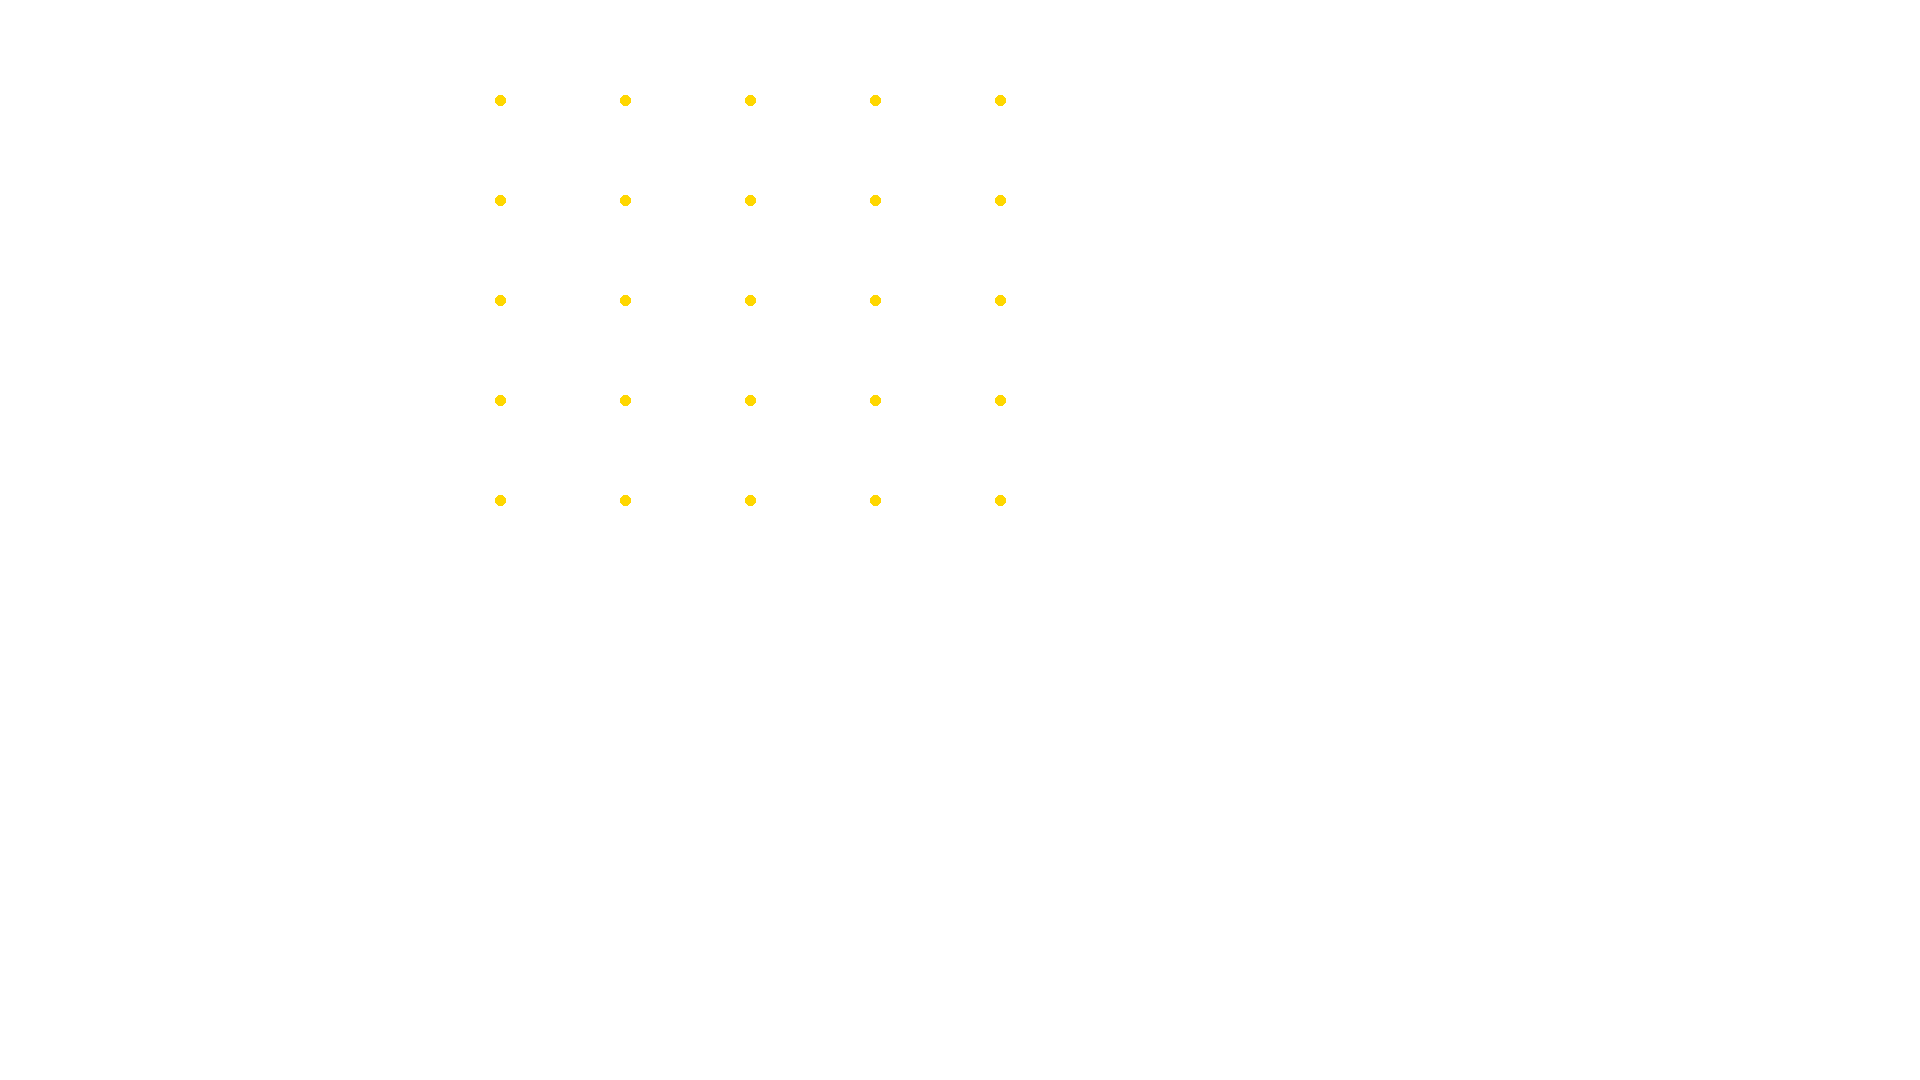

In [442]:
from PIL import Image, ImageDraw
import numpy as np

def overlay_circles_on_image(image_path, num_points, circle_radius, circle_color, top_left, top_right, bottom_left, bottom_right):
    # Open the image
    image = Image.open(image_path)
    
    # Calculate the width and height based on the provided coordinates
    width = top_right[0] - top_left[0]
    height = bottom_left[1] - top_left[1]
    
    # Generate evenly spaced points within the defined box
    blotch_every_pxl_h = np.linspace(top_left[1], top_left[1] + height, num_points).astype(int)
    blotch_every_pxl_w = np.linspace(top_left[0], top_left[0] + width, num_points).astype(int)
    
    # Create an ImageDraw object
    draw = ImageDraw.Draw(image)
    
    # Draw circles at the evenly spaced points within the defined box
    for y in blotch_every_pxl_h:
        for x in blotch_every_pxl_w:
            # Define the bounding box for the circle
            left_up_point = (x - circle_radius, y - circle_radius)
            right_down_point = (x + circle_radius, y + circle_radius)
            two_point_list = [left_up_point, right_down_point]

            # Draw a filled circle on the image
            draw.ellipse(two_point_list, fill=circle_color)
    
    return image

# Example usage
processed_image = overlay_circles_on_image(
    'White_Picture(1920x1080).jpg',
    num_points=5,
    circle_radius=5,
    circle_color=(255, 215, 0, 255),
    #Note: 
    # origin(0,0) of picture is at top-left corner
    # x-axis increases to the right
    # y-axis increases downward
    top_left=(500, 100),    # Coordinates of top left of  (x,y)
    top_right=(1000, 100),   # Coordinates of top right of box (x,y)
    bottom_left=(500, 500),  # Coordinates of bottom left of box (x,y)
    bottom_right=(1000, 500) # Coordinates of bottom right of box (x,y)
)

# Save and display the processed image
processed_image

In [6]:
# Resolution of our pictures 1280x720 pixels


# Create Random Points








In [ ]:
#Generate loop